> # Characterization of Written Texts by Fractal Dimension (Higuchi Method) and Detrended Fluctuation Analysis.
>@aut: Jorge Adán G.
>
>ref: T. Higuchi (1988). Approach to an Irregular Time Series on the Basis of the Fractal Theory. Physica D. Amsterdam. Also Jorge Adán Gonzalez (2022). Characterization of Writen Texts by Fibonacci 
Transform (for DFA see more at https://physionet.org/content/dfa/1.0.0/) 
>
>This work aims to characterize written texts to verify the distinction between natural language and synthetically generated language. It seeks to establish a method to discern texts that obey grammatical rules from those randomly generated texts. To verify this we are going to compare the text with the shuffled case of the book.


>The first part we are going to work is on the properties of the cumulative sum to obtain a sequence from the behavior of the vowels in a written text. We will consider the sequence as a time series to make a characterization by the fractal dimension (Higuchi method) and detrended fluctuation analysis (DFA).
> When using these methods, it is convenient to characterize the structure of the text based on the order of the words, since the complexity in the structure that we are looking for is in the ordering of the words.
>
>In the same way that we have been working with vowels in my previous work on the Characterization of Written Texts by the Fibonacci Transform, the analogous way to do it for an accumulated sequence is by the rule for a pair of vowels $(v_0, v_1)$:
>
>    $ v_0 \rightarrow -1 $
>
>    $ v_1 \rightarrow 1 $
>
>For example, if we consider to associate:
>     $ i \rightarrow (-1) $ and
>     $ e \rightarrow 1 $,
>then we want to obtain the list:
>
> 'This is an example' $\rightarrow [-1, -1, 1, 1]$ 
>
>Note that we are ignoring whether or not is a capital letter. We can implement this straightforward:
>

In [1]:
def vow_to_seq(c1, c2, text):
    seq = []
    
    for i in text:
        if i == c1 or i == c1.upper():
            seq.append(-1)
        elif i == c2 or i == c2.upper():
            seq.append(1)
        else:
            pass
            
    return seq

>Using the same text as our previous work by Fibonacci transformation

In [2]:
text_name = '../input/sherlock-holmes-txt/Sherlock.txt'

with open(text_name, encoding='utf8') as f:
    text = f.read()
    
print(text[:500])

The Adventures of Sherlock Holmes

by Arthur Conan Doyle


Contents

   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue Carbuncle
   VIII.  The Adventure of the Speckled Band
   IX.    The Adventure of the Engineer’s Thumb
   X.     The Adventure of the Noble Bachelor
   XI.    The Adventure of the Beryl Coronet
 


>And also writing a function that shuffle the text in order to make the comparison 

In [3]:
import random
from random import shuffle

def scramble(sentence):
    split = sentence.split()  
    shuffle(split)
    return ' '.join(split)

print(scramble(text)[:500])

me were who I that levers to-night.” will that upon not about shall you’ll young. pips and imagination.” writing, it business.” great soul! He boots about manual was least,” and advice.” face, would then just up ever a see a ‘I precaution Tollers with him very the with in break “I a at monotonous in grey said “Oh, the high, you.” time rascally an came that it. will one foot of dangling at meet over looking personal the is from earn You she. been upon and disappearance I course attracted I or I i


> in this way we can study how these two texts differ to see if we can find a relationship with the grammatical structures of the original text.
>
> In order to generate the cumulative sum we can just use the cumsum function from numpy library, but we are going to work with the explicit formula since we are going to make an adjustment with respect to the mean. 
>
> For example, we can visualize for the vowels (o,u):

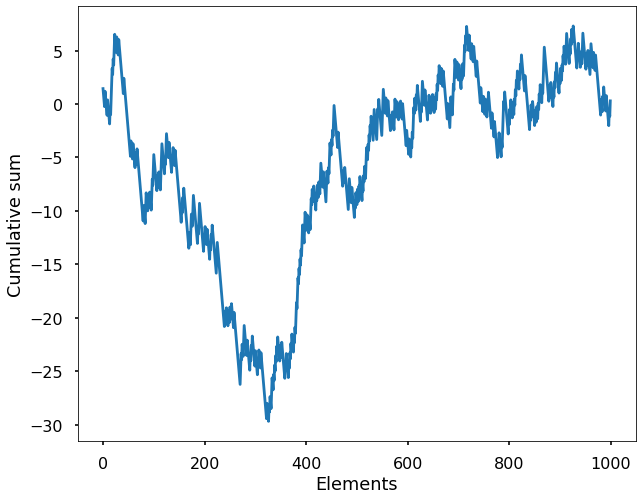

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def seq_to_sum(seq):
    import numpy as np
    
    # Teniendo la secuencia de -1s y 1s, se hace la acumulación mediante la suma yn = sum_(i=1)^n [xi]

    seq_ac = []
    xn = 0
    mean = np.mean(seq)

    for xi in seq:
        xn = xi + xn - mean
        seq_ac.append(xn)

    seq_ac = np.array(seq_ac)

    return seq_ac

seq = vow_to_seq('o', 'u', text)
seq_ac = seq_to_sum(seq)

# Visualization
plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.xlabel("Elements")
plt.ylabel("Cumulative sum")
plt.plot(seq_ac[0:1000])
plt.show()





> We write a function in order to do every process at once, making the option to shuffle text by a given seed

In [5]:
def vow_to_data(c1, c2, text, mySeed):
    
    if mySeed != None:
        text = scramble(text)
    
    seq = vow_to_seq(c1, c2, text)
    data = seq_to_sum(seq)
    
    return data
    

# Fractal Dimension (Higuchi Method)

> We are ready to apply the Higuchi method, which is a  method used to obtain the dimension. This method is based on an algorithm that allows obtaining points in the Log(k)-LogL(k) plane and thus adjusting by least squares and determining the slope. So the power law implies that <L(k)> ~ k^(-D). The details are in the first reference. We implement it straightforward.

In [6]:
def higuchi(data): 
    import numpy as np
    import sys, random,string,math
# 
    N = len(data)
    lk = int(N/10) #around(N/10)
    Lpp = []
    KK = []
    k = 1
    
    while k < lk + 1:
    #for k in range(1,lk+1):
        k = int(ceil(k))	
        Lpro = 0
        for m in range(1,k+1):
            a = arange(m-1,N,k)
            nn = ceil(N-m/k)
            tam = len(a)-1   
            Lmk = 0
            for i in range(0,tam):
                    Lmk = Lmk+abs(data[a[i+1]]-data[a[i]])*(N-1)/(nn*k*k)
        
            Lpro = Lpro+Lmk
            
        Lpp.append(Lpro)
        KK.append(k)
        k = k+k*0.2 
        #print k,Lpp 
    #K = arange(1,len(Lpp)+1)
    klog = []
    
    for i in KK:
        z = math.log(i)
        klog.append(z)
    Lpplog = []
    for j in Lpp:
        y=math.log(j)
        Lpplog.append(y)

    return klog, Lpplog

> We apply it for the vowels (a,e)

Higuchi Dimension: 1.458524588719885


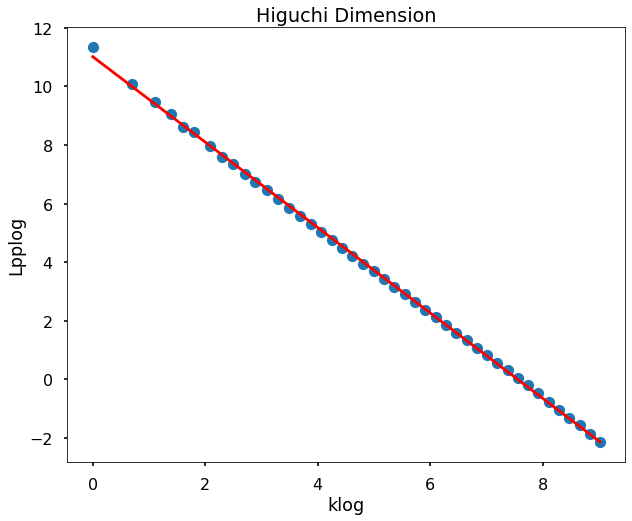

In [7]:
# Método explícito
#Secuencia sin shufflear (seed = None)

from numpy import *
import scipy
from scipy import stats


mySeed = None
data = vow_to_data('a', 'e', text, mySeed)
klog, Lpplog = higuchi(data)

alpha = scipy.stats.linregress(klog, Lpplog)
m = alpha[0]
b = alpha[1]

x = np.array(klog)

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.title('Higuchi Dimension')
plt.xlabel("klog")
plt.ylabel("Lpplog")
plt.plot(klog, Lpplog, 'o')
plt.plot(x, m*x + b, 'r')
plt.show

print('Higuchi Dimension: ' + str(abs(m)))

>With this method we calculate all the fractal dimensions for the text, and also for the shuffled text for every pair of vowels. It is worth mentioning that for the shuffled text we have made 200 random calculation since the computation time is considerable, and we give an average of the shuffled forms. I attach a cvs that contains all the calculations for the other vowels and the shuffled variants.

# DFA

> We are interested in calculate the fluctuation using the explicit formula from the reference.
>
> For many types of time series the fluctuation behavior is logarithmic with respect to the window size $n$. When we have this logarithmic behavior we say that it is statistical self-similarity. 
> Taking the log-log plot of $F(n)$ versus $n$ and making a linear regression we calculate the exponent 𝛼, which is calculated as the slope of a straight line that fits the log-log scale plot.

In [8]:
def dfa(data):
    import random,string,math
    from random import randint

    n = len(data)
    mu = mean(data)
    #y=list(data)
    y = []
    for i in range(1,n):
        ys = sum(data[0:i]-mu)
        y.append(ys)
        #print ys

    k = 4
    j = 1

    logk = []
    logsqrt = []
    while k <= n/5:
        suma = 0		
        for m in range(1,int(n/k)):
            a = 0
            b = 0
            a,b = polyfit(range(int(k*(m-1)),int(k*m)),y[int(k*(m-1)):int(k*m)],1)
            tau = []
            t = 0 
            for i in range(int(k*(m-1)),int(k*m)):
                t=y[i]-(a*(i)+b)
                tau.append(t)
            
            sm = 0                 		
            for s in tau:
                sm = sm+float(s*s)			
            
            suma = suma+sm

        sumatot = float(suma/n)

        logk.append(log10(k))
        logsqrt.append(log10(sqrt(sumatot)))

        k=ceil(k+k*(0.1))

    return logk, logsqrt

> Using it for the pair of vowels (a,e) we obtain:


DFA: 1.5382373943629688


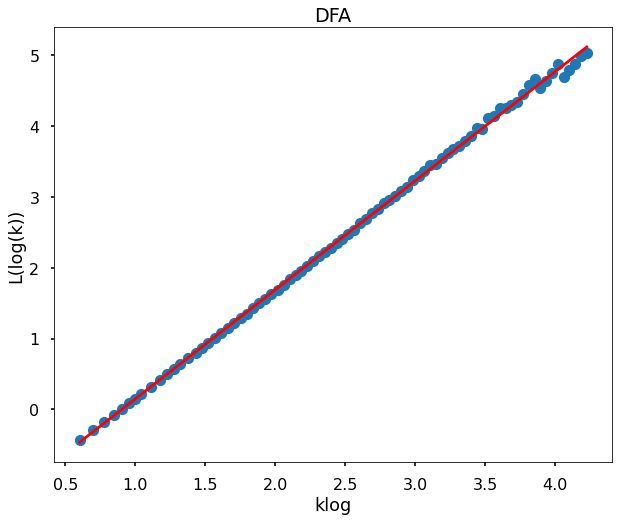

In [9]:
# Using it for the pair of vowels (a,e), i.e. using the "data" variable:

import scipy
from scipy import stats

x, y = dfa(data)
x = np.array(x)
y = np.array(y)

alpha = scipy.stats.linregress(x, y)
m = alpha[0]
b = alpha[1]

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.title('DFA')
plt.xlabel("klog")
plt.ylabel("L(log(k))")
plt.plot(x, y, 'o')
plt.plot(x, m*x + b, 'r')
plt.show

print('DFA: ' + str(abs(m)))

> We can continue with the rest of the vowels and also the shuffled case. I list the calculations in the .CVS

In [10]:
import pandas as pd

table = '../input/fractald-dfa-fibo/data_fibo.csv'
df = pd.read_csv(table, index_col=0)

df

,D_hig,DFA,D_hig_mean,DFA_mean,std_D_hig,std_DFA,m,b,m_mean,b_mean,std_m,std_b
vowels,,,,,,,,,,,,
ea,1.458935,1.537757,1.528183,1.474855,0.016505,0.019473,0.659868,-0.648270,0.660997,0.014193,0.001922,85.405226
ai,1.463665,1.531527,1.523218,1.477284,0.016531,0.030805,0.856456,-57.361404,0.857754,0.075573,0.003021,83.842331
ao,1.447223,1.542101,1.515540,1.477463,0.018407,0.015642,0.949817,18.604271,0.953979,0.068890,0.003408,94.034470
au,1.415597,1.569071,1.520836,1.477657,0.017780,0.025848,0.364883,80.853218,0.372676,0.068035,0.001622,45.978420
ei,1.468129,1.523679,1.520339,1.470386,0.020851,0.021862,0.565217,-59.932681,0.566843,-0.145894,0.001846,78.118656
eo,1.447197,1.548858,1.515277,1.486021,0.014973,0.021179,0.626834,16.069217,0.630673,-0.021015,0.001978,86.479284
eu,1.409839,1.585815,1.515448,1.485843,0.012913,0.021452,0.240810,79.690752,0.246352,-0.090385,0.001040,45.398081
oi,1.504702,1.493839,1.516809,1.465258,0.020241,0.017938,0.901695,-73.093017,0.898889,-0.010039,0.003054,83.001055
iu,1.451354,1.541765,1.516868,1.477311,0.016394,0.018340,0.426063,103.780695,0.434435,0.033838,0.001991,49.612882


> We generate the possible scatterplots:

<Figure size 720x576 with 0 Axes>

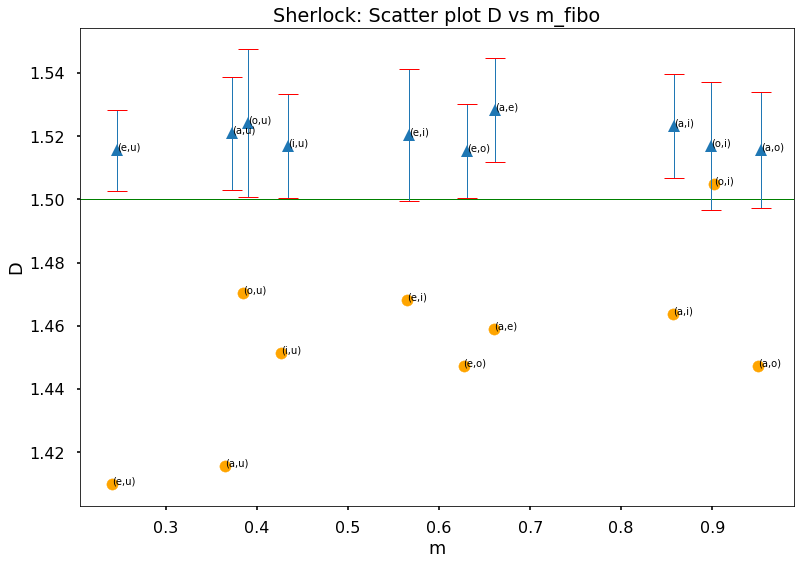

In [11]:
import matplotlib.pyplot as plt
from numpy import sqrt 

phi = (1+sqrt(5))/2

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))

x1 = df['m'].values.tolist()
y1 = df['D_hig'].values.tolist()

x2 = df['m_mean'].values.tolist()
y2 = df['D_hig_mean'].values.tolist()
sigma  = df['std_D_hig']

n1 = ['(a,e)',   '(a,i)',  '(a,o)',  '(a,u)' ,
      '(e,i)', '(e,o)', '(e,u)', 
      '(o,i)', '(i,u)', 
      '(o,u)']
n2 = n1

fig, ax = plt.subplots()

plt.axhline(y = 1.5, color = 'g', linewidth = 1)

ax.scatter(x1, y1, marker = 'o', color='orange')
(_, caps, _) = plt.errorbar(x2, y2, sigma, linestyle='None', marker='^', capsize=10, elinewidth=1)
for cap in caps:
    cap.set_color('red')
    cap.set_markeredgewidth(1)


for i, txt in enumerate(n1):
    ax.annotate(txt, (x1[i], y1[i]))

for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]))

plt.title("Sherlock: Scatter plot D vs m_fibo")
plt.xlabel("m")
plt.ylabel("D")
plt.show()

<Figure size 720x576 with 0 Axes>

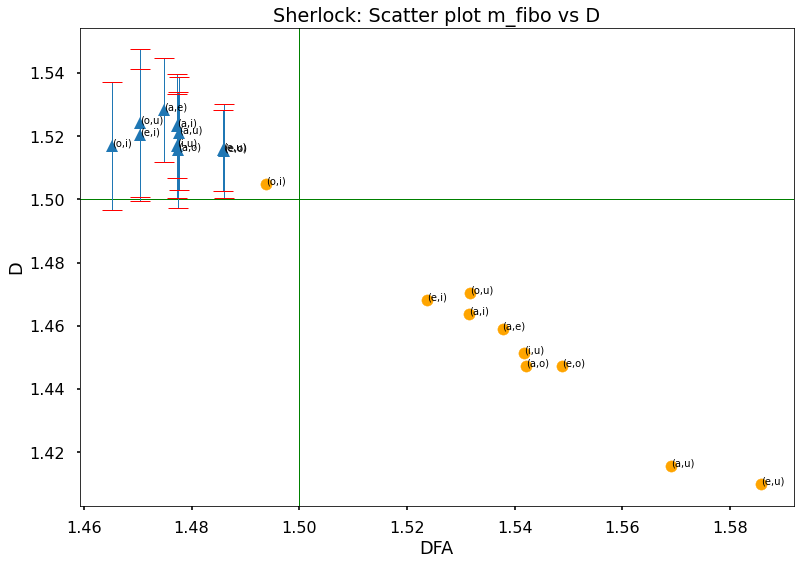

In [12]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))

x1 = df['DFA'].values.tolist()
y1 = df['D_hig'].values.tolist()

x2 = df['DFA_mean'].values.tolist()
y2 = df['D_hig_mean'].values.tolist()
sigma  = df['std_D_hig']

n1 = ['(a,e)',   '(a,i)',  '(a,o)',  '(a,u)' ,
      '(e,i)', '(e,o)', '(e,u)', 
      '(o,i)', '(i,u)', 
      '(o,u)']
n2 = n1

fig, ax = plt.subplots()
plt.axvline(x = 1.5, color = 'g', linewidth = 1)
plt.axhline(y = 1.5, color = 'g', linewidth = 1)
ax.scatter(x1, y1, marker = 'o', color='orange')
        # ax.scatter(x2, y2, marker = 'x')
(_, caps, _) = plt.errorbar(x2, y2, sigma, linestyle='None', marker='^', capsize=10, elinewidth=1)
for cap in caps:
    cap.set_color('red')
    cap.set_markeredgewidth(1)


for i, txt in enumerate(n1):
    ax.annotate(txt, (x1[i], y1[i]))

for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]))

plt.title("Sherlock: Scatter plot m_fibo vs D")
plt.xlabel("DFA")
plt.ylabel("D")
plt.show()

<Figure size 720x576 with 0 Axes>

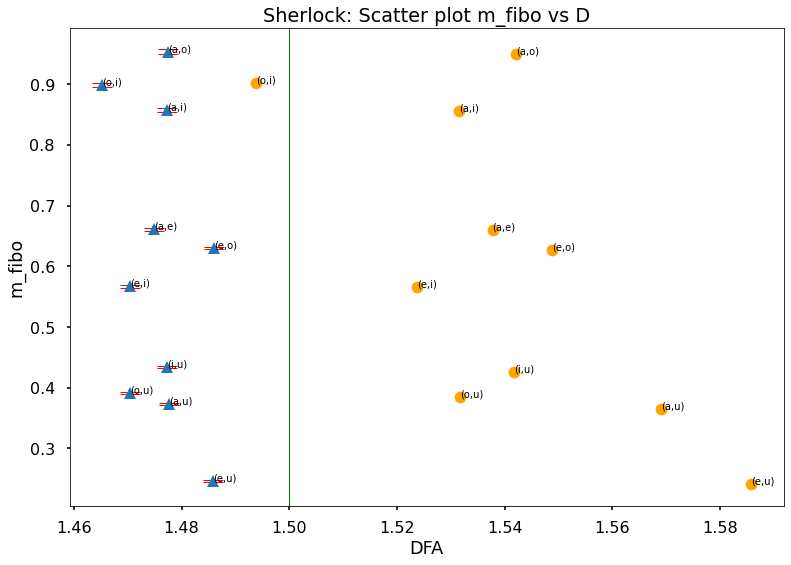

In [13]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))

x1 = df['DFA'].values.tolist()
y1 = df['m'].values.tolist()

x2 = df['DFA_mean'].values.tolist()
y2 = df['m_mean'].values.tolist()
sigma  = df['std_m']

n1 = ['(a,e)',   '(a,i)',  '(a,o)',  '(a,u)' ,
      '(e,i)', '(e,o)', '(e,u)', 
      '(o,i)', '(i,u)', 
      '(o,u)']
n2 = n1

fig, ax = plt.subplots()

plt.axvline(x = 1.5, color = 'g', linewidth = 1)

ax.scatter(x1, y1, marker = 'o', color='orange')
        # ax.scatter(x2, y2, marker = 'x')
(_, caps, _) = plt.errorbar(x2, y2, sigma, linestyle='None', marker='^', capsize=10, elinewidth=1)
for cap in caps:
    cap.set_color('red')
    cap.set_markeredgewidth(1)

for i, txt in enumerate(n1):
    ax.annotate(txt, (x1[i], y1[i]))

for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]))

plt.title("Sherlock: Scatter plot m_fibo vs D")
plt.xlabel("DFA")
plt.ylabel("m_fibo")
plt.show()

> We see that for each case, the original text differs from the synthetically generated text. So it is possible to determine which text is the one that has been written according to the grammatical rules of the language.
>
> It is observed that the synthetically generated text tends to values $D = 1.5$ and $\alpha = 1.5$ , which corresponds to quantities close to the fractal dimension of a Brownian movement, and DFA of a Brownian noise respectively. This makes sense as it indicates totally random text. Also the original text tends to move away from these values revealing the global grammatical structure of the text